In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
data = pd.read_csv("all-data.csv", encoding='latin')

In [138]:
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [139]:
data['text']=data['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .']

In [140]:
data= data.drop('According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', axis=1)

In [141]:
data

,neutral,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


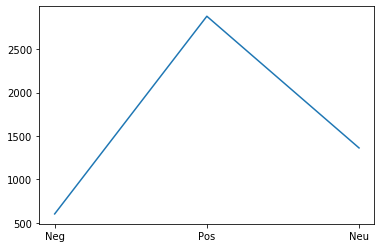

In [142]:
ndata= data.groupby('neutral')['text'].count()
plt.plot(["Neg", "Pos", "Neu"], ndata)
plt.show()


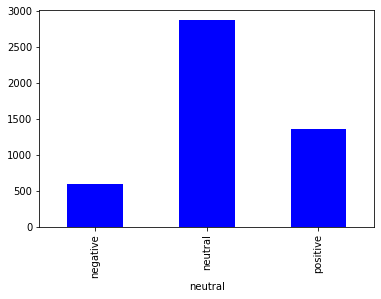

In [143]:
labels=["Neg", "Pos", "Neu"]
ndata.plot(kind='bar',color='blue')
plt.show()

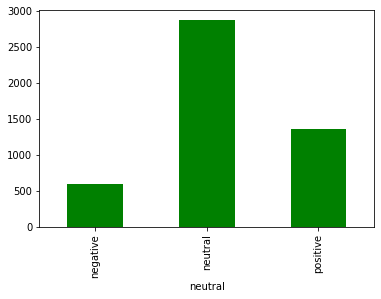

In [144]:
newdata= data.groupby('neutral')['neutral'].count()
#newdata.plot(kind='pie',color='blue')
y=newdata.values
newdata.plot(kind='bar',color='green')
plt.show()

In [145]:
new =[]
for i in data['neutral']:
    if i == 'positive':
        new.append(1)
    elif i=='negative':
        new.append(-1)
    else:
        new.append(0)
    

In [146]:
len(new)

4845

In [147]:
data['neutral']=new

In [148]:
data

,neutral,text
0,0,Technopolis plans to develop in stages an area...
1,-1,The international electronic industry company ...
2,1,With the new production plant the company woul...
3,1,According to the company 's updated strategy f...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,-1,LONDON MarketWatch -- Share prices ended lower...
4841,0,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,-1,Operating profit fell to EUR 35.4 mn from EUR ...
4843,-1,Net sales of the Paper segment decreased to EU...


In [149]:

from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer


In [150]:
stemmer = PorterStemmer() 
lemmatizer=WordNetLemmatizer()


In [151]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download("wordnet") #

[nltk_data] Downloading package wordnet to /home/naseri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [152]:
stop_word= stopwords.words('english') 

In [153]:
import re
ctext=[]
for i in data['text']:
    i = re.sub("[%()]"," ", i)
    sent = sent_tokenize(i)
    
    nsent= ""
    for j in sent:
        w= word_tokenize(j)
        nw=""
        for k in w:
            if k not in stop_word:

                st=stemmer.stem(k)
                st=lemmatizer.lemmatize(str(st))
                nw+=st+ " "
            nsent+= nw
        ctext.append(nsent)
    

In [154]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer,TfidfVectorizer


In [155]:
victor = TfidfVectorizer() # changing text to zero and one

In [156]:
cv= victor.fit_transform(ctext)

In [157]:
y = data['neutral']

In [158]:
y.shape

(4845,)

In [159]:
cv.shape

(4902, 7887)

In [160]:
from sklearn.naive_bayes import MultinomialNB


In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test= train_test_split(cv[0:4845], y, test_size=0.2, random_state=99) 

In [163]:
print(x_train.shape, y_train.shape)

(3876, 7887) (3876,)


In [164]:
model=MultinomialNB()

In [165]:
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
model.score(x_test, y_test) # 

0.628482972136223

In [167]:
from sklearn.svm import LinearSVC

In [168]:
model1=LinearSVC()

In [169]:
model1.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [170]:
model1.score(x_test, y_test)

0.6408668730650154

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
model3 = KNeighborsClassifier()

In [173]:
model3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [174]:
model3.score(x_test, y_test)

0.6202270381836945